In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [5]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
# Decision Tree Classifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [8]:
# Accuracy
predictions = dtree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.9555555555555556


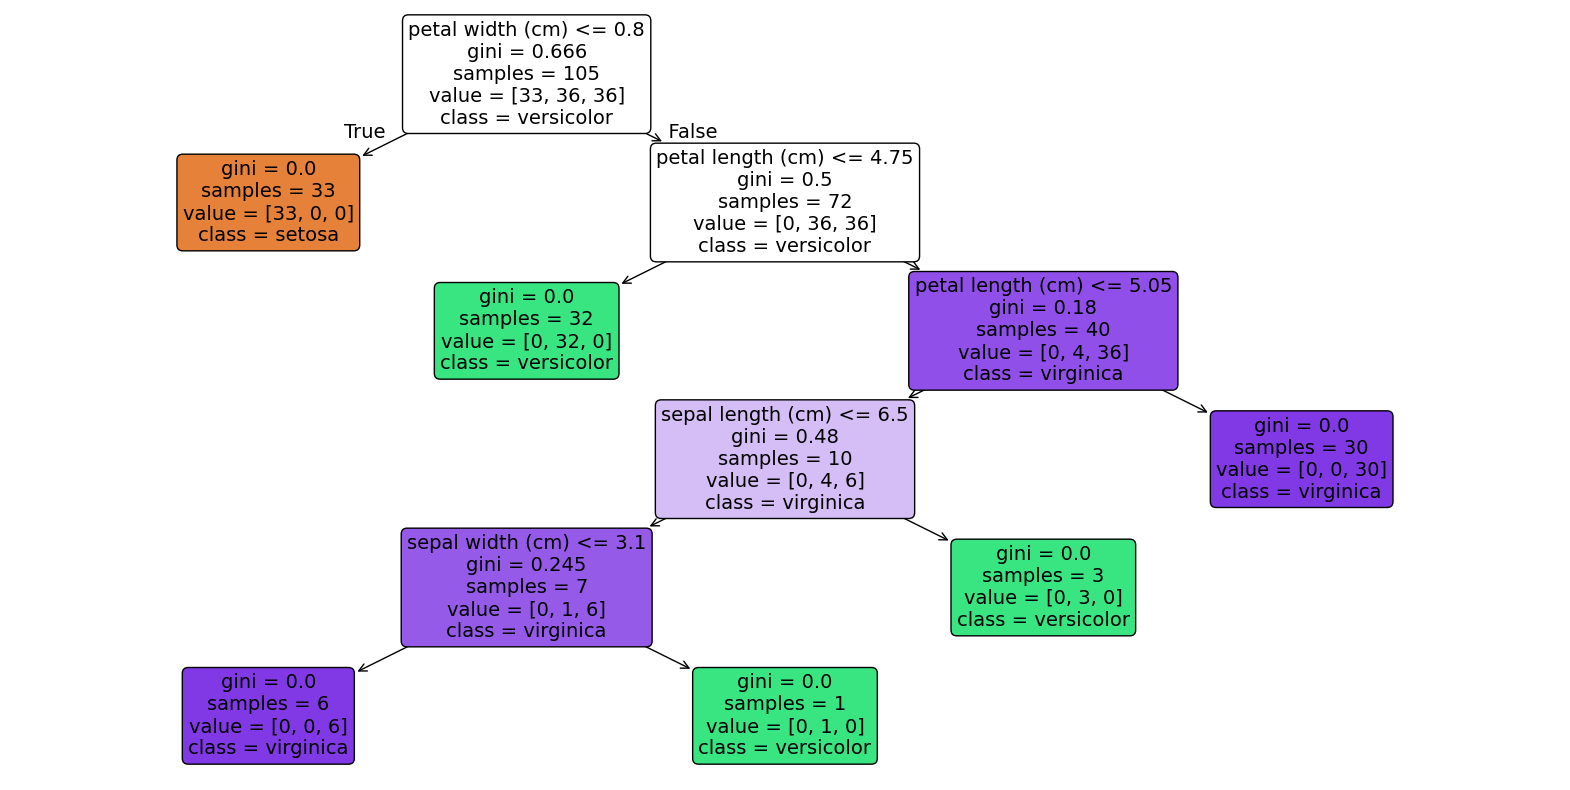

In [9]:
plt.figure(figsize=(20,10))
plot_tree(dtree, filled=True,
feature_names=iris.feature_names, class_names=iris.target_names, rounded=True,
fontsize=14)
plt.show()


In [10]:

# Random Forest Model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
# Predictions and Evaluation
rf_predictions = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, rf_predictions))

Accuracy: 0.9555555555555556


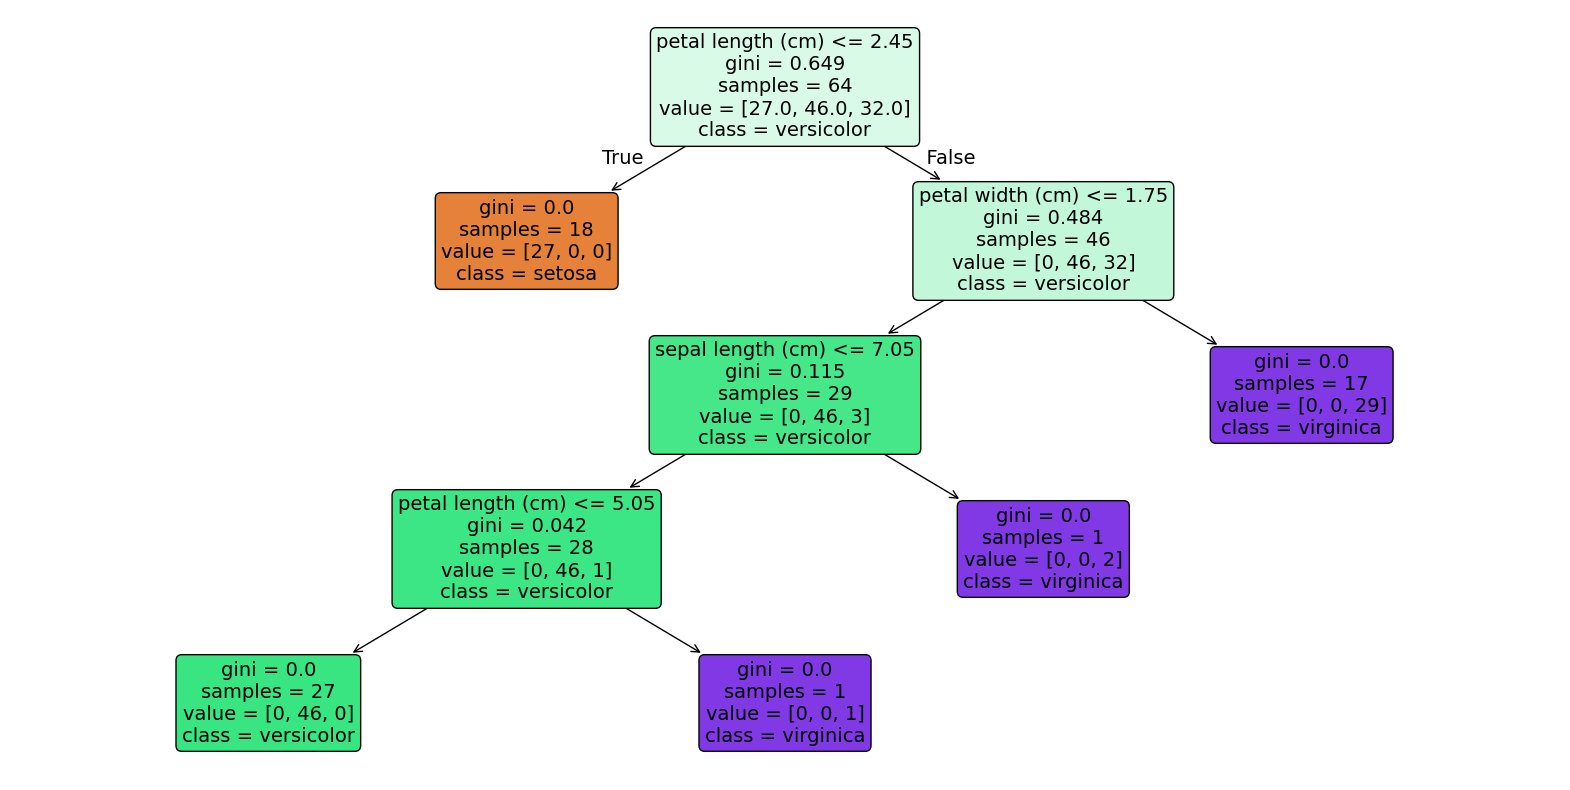

In [12]:
plt.figure(figsize=(20,10))
plot_tree(rf.estimators_[0], filled=True,
          feature_names=iris.feature_names, class_names=iris.target_names, rounded=True,
          fontsize=14)
plt.show()

In [13]:
from sklearn.model_selection import GridSearchCV

# Decision Tree Tuning using GridSearchCV
param_grid = {
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 5, 10]
}

dtree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [14]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 3, 'min_samples_split': 2}
Best Accuracy: 0.9428571428571427


In [15]:
# Evaluate on test set
best_dtree = grid_search.best_estimator_
y_pred = best_dtree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9333333333333333


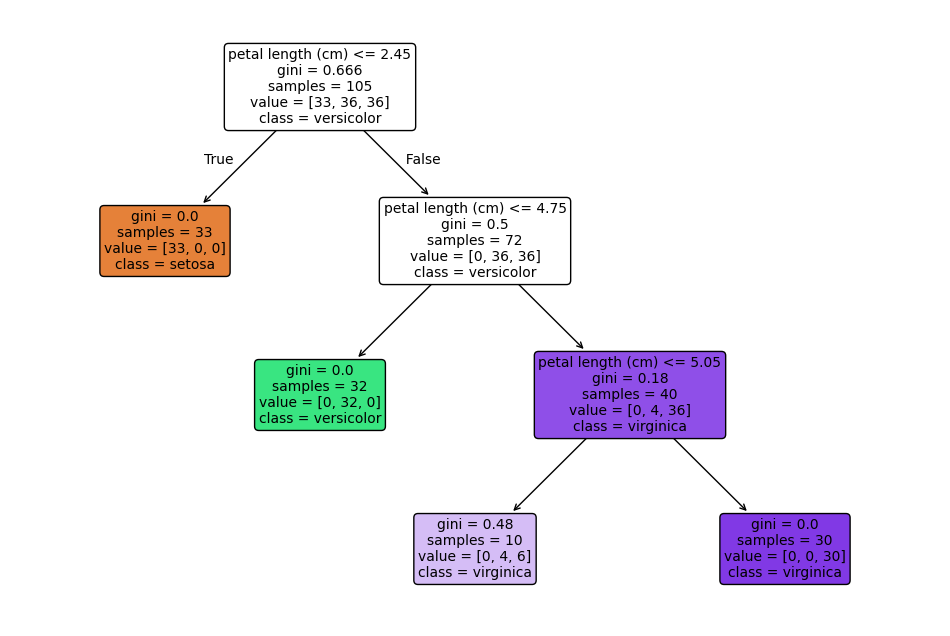

In [16]:
# Visualize the best tree
plt.figure(figsize=(12, 8))
plot_tree(best_dtree, filled=True, feature_names=iris.feature_names,
          class_names=iris.target_names, rounded=True, fontsize=10)
plt.show()

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [18]:
# Random Forest Exploration
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [19]:
# Best parameters and best score
print("Best Parameters (Random Forest):", grid_search_rf.best_params_)
print("Best Accuracy (Random Forest):", grid_search_rf.best_score_)


Best Parameters (Random Forest): {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy (Random Forest): 0.9619047619047618


In [20]:
# Evaluate on test set
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Test Accuracy (Random Forest):", test_accuracy_rf)

Test Accuracy (Random Forest): 0.9555555555555556


In [21]:
# Feature Importance Analysis - Decision Tree
print("Decision Tree Feature Importances:")
for feature, importance in zip(iris.feature_names, best_dtree.feature_importances_):
    print(f"{feature}: {importance}")

# Feature Importance Analysis - Random Forest
print("\nRandom Forest Feature Importances:")
for feature, importance in zip(iris.feature_names, best_rf.feature_importances_):
    print(f"{feature}: {importance}")

Decision Tree Feature Importances:
sepal length (cm): 0.0
sepal width (cm): 0.0
petal length (cm): 1.0
petal width (cm): 0.0

Random Forest Feature Importances:
sepal length (cm): 0.10670960190829817
sepal width (cm): 0.027396025532007623
petal length (cm): 0.5001591841868913
petal width (cm): 0.36573518837280294
